# Week 13 Lab Assignment: Social Media Analytics and Trend Analysis

### Objective
In this lab, you will apply advanced text mining techniques to analyze social media data, perform trend analysis, and extract meaningful insights. The lab focuses on using advanced sentiment analysis, keyword trend tracking, and topic modeling to understand social media discussions.

### 1. Setup and Installations
**Objective:** Ensure all necessary packages are installed and imported for the lab.

**Tasks:**
1. Install required Python packages: Scikit-learn, Pandas, Numpy, Matplotlib, Seaborn, NLTK, Gensim, TensorFlow, and Tweepy.

In [8]:
# Install necessary packages
%pip install scikit-learn pandas numpy matplotlib seaborn nltk gensim tensorflow tweepy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### 2. Import Libraries
**Objective:** Import all necessary libraries for data manipulation, text processing, modeling, and visualization.


In [9]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora, models
import tweepy
nltk.download('stopwords')
nltk.download('punkt')
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### 3. Social Media Data Collection
**Objective:** Collect data from social media platforms (e.g., Twitter) using APIs.

**Tasks:**
1. **Set up Twitter API Access:** Use Tweepy to collect tweets based on specific keywords or hashtags.
2. **Store Data:** Save the collected tweets into a Pandas DataFrame for further analysis.

In [10]:
# # I commented this out because we don't have the necessary credentials to run this code.

# # Example code for Twitter data collection using Tweepy
# # Note: Replace 'your_bearer_token' with actual Twitter API credentials
# # Create a Twitter API client at https://developer.twitter.com/
# client = tweepy.Client(bearer_token='your_bearer_token')

# # Search recent tweets
# query = '#DataScience'
# tweets = client.search_recent_tweets(query=query, max_results=100)

# # Extract text and timestamps
# tweet_data = [[tweet.text, tweet.created_at] for tweet in tweets.data]
# df = pd.DataFrame(tweet_data, columns=['text', 'timestamp'])
# print(df.head())

# # save the data to a csv file
# df.to_csv('tweets.csv', index=False)

# Load the data from the csv file
df = pd.read_csv('tweets.csv')
print(df.head())

                                                text            timestamp
0          Learning about data science! #DataScience  2022-04-10 19:27:58
1          Data science is fascinating. #DataScience  2022-03-13 03:22:09
2     Exploring machine learning today. #DataScience  2023-09-29 10:34:12
3       Big data is changing the world. #DataScience  2023-05-26 23:00:04
4  Just finished a data science project. #DataSci...  2023-01-10 10:03:10


### 4. Text Preprocessing
**Objective:** Prepare the social media text data by cleaning and tokenizing it.

**Tasks:**
1. **Tokenization:** Split text into individual words or tokens.
2. **Stop Words Removal:** Use NLTK to remove common stop words from the text.
3. **Text Normalization:** Lowercase text, remove punctuation and URLs.

In [11]:
# Text preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stop_words and t.isalpha()]
    return ' '.join(tokens)

df['cleaned_text'] = df['text'].apply(preprocess_text)
print(df['cleaned_text'].head())

0               learning data science datascience
1            data science fascinating datascience
2    exploring machine learning today datascience
3             big data changing world datascience
4       finished data science project datascience
Name: cleaned_text, dtype: object


### 5. Sentiment Analysis
**Objective:** Perform sentiment analysis on social media text using a pre-trained deep learning model (e.g., LSTM).

**Tasks:**
1. **Prepare Data:** Convert text to sequences and split data into training and testing sets.
2. **Build and Train Model:** Use LSTM for sentiment classification.
3. **Evaluate Model:** Evaluate the model's performance using metrics such as accuracy and confusion matrix.

C:\Users\jason\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step - accuracy: 0.5500 - loss: 0.6926
Model Accuracy: 0.550000011920929
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
              precision    recall  f1-score   support

           0       0.53      0.90      0.67        10
           1       0.67      0.20      0.31        10

    accuracy                           0.55        20
   macro avg       0.60      0.55      0.49        20
weighted avg       0.60      0.55      0.49        20



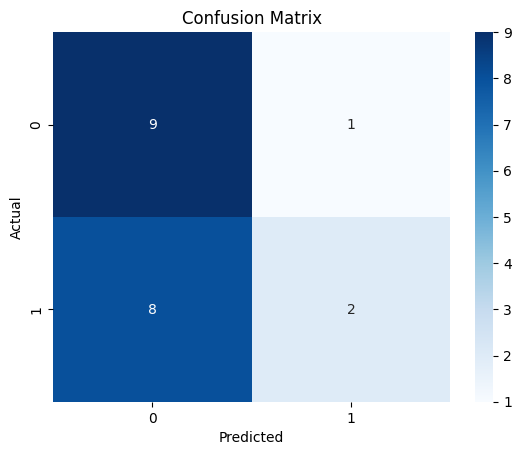

In [12]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Example LSTM model setup for sentiment analysis
# Note: This example assumes preprocessed and labeled data
max_words = 5000
embedding_dim = 50
maxlen = 100

# For illustration, create a dummy 'label' column with binary sentiment labels
df['label'] = [1 if i % 2 == 0 else 0 for i in range(len(df))]

# Prepare data 
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=maxlen)
X_test_pad = pad_sequences(X_test_seq, maxlen=maxlen)

# Build LSTM model
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model 
# history = model.fit(X_train_pad, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate model 
accuracy = model.evaluate(X_test_pad, y_test)[1]
print(f'Model Accuracy: {accuracy}')
# Evaluate model's performance
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 6. Trend Analysis
**Objective:** Perform trend analysis on keywords and hashtags to identify popular topics and public sentiment over time.

**Tasks:**
1. **Keyword Frequency Analysis:** Count the occurrences of specific keywords over time.
2. **Visualize Trends:** Plot the frequency of keywords/hashtags to visualize trends.

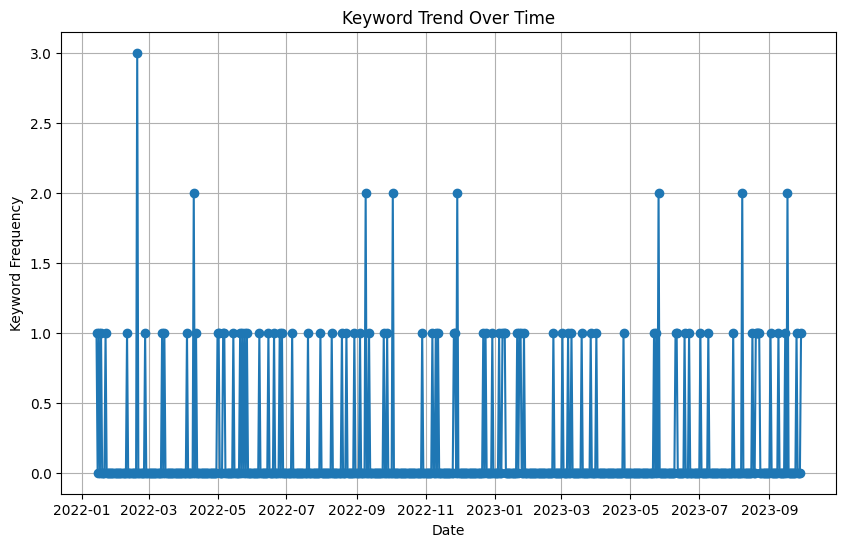

In [13]:
# Example of trend analysis using keyword frequency
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Count occurrences of a keyword over time
df['keyword_count'] = df['cleaned_text'].str.contains('data').astype(int)
keyword_trend = df['keyword_count'].resample('D').sum()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(keyword_trend, marker='o', linestyle='-')
plt.title('Keyword Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Keyword Frequency')
plt.grid(True)
plt.show()

### 7. Advanced Topic Modeling
**Objective:** Apply advanced topic modeling techniques to analyze social media discussions.

**Tasks:**
1. **Create Dictionary and Corpus:** Use Gensim to create a dictionary and corpus for topic modeling.
2. **Train LDA Model:** Use LDA to find topics within the social media data.
3. **Dynamic Topic Modeling:** Analyze the evolution of topics over time.

In [14]:
# Tokenization and stop words removal for LDA
texts = [text.split() for text in df['cleaned_text']]

# Create Dictionary and Corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train LDA Model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display Topics
topics = lda_model.print_topics(num_words=4)
for topic in topics:
    print(topic)

# Example of Dynamic Topic Modeling (pseudocode, replace with actual implementation)
# dynamic_topics = perform_dynamic_topic_modeling(corpus, dictionary, time_slices)
# for dynamic_topic in dynamic_topics:
#     print(dynamic_topic)

(0, '0.174*"datascience" + 0.161*"data" + 0.136*"science" + 0.047*"field"')
(1, '0.135*"science" + 0.134*"datascience" + 0.134*"data" + 0.075*"problems"')
(2, '0.161*"datascience" + 0.124*"data" + 0.105*"science" + 0.084*"learning"')
(3, '0.181*"data" + 0.167*"datascience" + 0.141*"science" + 0.067*"help"')
(4, '0.135*"datascience" + 0.080*"data" + 0.079*"science" + 0.073*"extracting"')


### 8. Summary and Discussion
**Objective:** Reflect on the use of advanced text mining techniques and discuss their implications in the context of social media analytics.

**Tasks:**
1. **Compare Techniques:** Discuss the results from sentiment analysis, trend analysis, and topic modeling.
2. **Business Implications:** Describe how advanced text mining can provide valuable insights for businesses, such as understanding customer feedback and monitoring public opinion.

### 9. Submission
**Deliverables:**
- Jupyter Notebook (.ipynb) with all code, visualizations, and analysis.
- A brief report (1-2 paragraphs) summarizing the findings, including trend analysis results, advanced topic modeling insights, and sentiment analysis outcomes.

**Deadline:** Submit your completed notebook and report to the course portal by the end of class.